In [15]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/LifeExpectancy.csv')
#df = pd.read_csv('data/delayedFlights.csv', na_values="-")
#headers = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","Credit Score","DriversLicense","Citizen","ZipCode","Income","ApprovalStatus"]
#df.columns = headers
print(df.head())

   Country  \
0  Turkiye   
1    Spain   
2    India   
3   Guyana   
4   Israel   

           Region  \
0     Middle East   
1  European Union   
2            Asia   
3   South America   
4     Middle East   

   Year  \
0  2015   
1  2015   
2  2007   
3  2006   
4  2012   

   Infant_deaths  \
0           11.1   
1            2.7   
2           51.5   
3           32.8   
4            3.4   

   Under_five_deaths  \
0               13.0   
1                3.3   
2               67.9   
3               40.5   
4                4.3   

   Adult_mortality  \
0         105.8240   
1          57.9025   
2         201.0765   
3         222.1965   
4          57.9510   

   Alcohol_consumption  \
0                 1.32   
1                10.35   
2                 1.57   
3                 5.68   
4                 2.89   

   Hepatitis_B  \
0           97   
1           97   
2           60   
3           93   
4           97   

   Measles  \
0       65   
1       94   
2       35   


In [17]:
print(len(df.columns), 'columns')
print(len(df), 'rows')

21 columns
2864 rows


In [18]:
pd.set_option('display.width', 10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [19]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country  \
0       False   
1       False   
2       False   
3       False   
4       False   
...       ...   
2859    False   
2860    False   
2861    False   
2862    False   
2863    False   

      Region  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
2859   False   
2860   False   
2861   False   
2862   False   
2863   False   

       Year  \
0     False   
1     False   
2     False   
3     False   
4     False   
...     ...   
2859  False   
2860  False   
2861  False   
2862  False   
2863  False   

      Infant_deaths  \
0             False   
1             False   
2             False   
3             False   
4             False   
...             ...   
2859          False   
2860          False   
2861          False   
2862          False   
2863          False   

      Under_five_deaths  \
0                 False   
1                 False   
2

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

columns_to_impute = [
    'Infant_deaths',
    'Under_five_deaths',
    'Adult_mortality',
    'Alcohol_consumption',
    'Hepatitis_B',
    'Measles',
    'BMI',
    'Polio',
    'Diphtheria',
    'Incidents_HIV',
    'GDP_per_capita',
    'Population_mln',
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years',
    'Schooling',
    'Life_expectancy'
]

for column in columns_to_impute:
    df[column] = imputer.fit_transform(df[[column]])

In [20]:
# Creating one column out of developing and developed economy status
df['Economy_Status'] = df['Economy_status_Developed']
df.drop(['Economy_status_Developed', 'Economy_status_Developing'], axis=1, inplace=True)

In [21]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country  \
0       False   
1       False   
2       False   
3       False   
4       False   
...       ...   
2859    False   
2860    False   
2861    False   
2862    False   
2863    False   

      Region  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
2859   False   
2860   False   
2861   False   
2862   False   
2863   False   

       Year  \
0     False   
1     False   
2     False   
3     False   
4     False   
...     ...   
2859  False   
2860  False   
2861  False   
2862  False   
2863  False   

      Infant_deaths  \
0             False   
1             False   
2             False   
3             False   
4             False   
...             ...   
2859          False   
2860          False   
2861          False   
2862          False   
2863          False   

      Under_five_deaths  \
0                 False   
1                 False   
2

In [113]:
df = df.sort_values(by='Year')
df.head(15)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_Status
803,Fiji,Oceania,2000,19.1,22.4,219.3440,2.460,98,84,26.3,91,90,0.03,4107,0.81,4.3,4.0,9.6,65.7,0
1527,Chad,Africa,2000,99.7,184.0,406.9915,0.300,27,64,20.9,30,36,1.39,375,8.36,11.5,11.4,1.4,47.7,0
2777,Turkmenistan,Asia,2000,57.5,69.7,235.6970,2.890,96,92,24.7,98,97,0.08,2288,4.52,3.6,3.6,9.9,63.6,0
2601,Algeria,Africa,2000,33.9,39.7,140.4860,0.250,81,78,24.3,86,86,0.01,3111,31.04,6.5,6.4,5.9,70.6,0
2604,Australia,Oceania,2000,5.1,6.2,77.0385,10.170,95,85,26.2,90,90,0.04,45559,19.15,0.7,0.7,11.9,79.2,1
2100,Nepal,Asia,2000,58.7,79.1,237.2425,0.084,46,65,20.7,74,74,0.17,561,23.94,18.5,19.2,2.4,62.3,0
2316,Bosnia and Herzegovina,Rest of Europe,2000,8.7,9.9,121.2340,3.870,92,74,24.8,87,85,0.08,2848,3.75,3.3,3.2,7.0,74.4,0
2607,Paraguay,South America,2000,27.9,33.9,169.3860,5.640,89,55,24.9,86,86,0.18,3904,5.32,2.5,2.4,5.9,70.5,0
1826,Guinea-Bissau,Africa,2000,105.0,173.8,304.3710,3.020,83,64,22.1,52,49,3.32,577,1.20,1.2,1.2,2.3,50.4,0
1078,Vietnam,Asia,2000,23.5,29.8,139.3635,0.710,85,65,19.9,96,96,0.25,1170,79.91,15.8,16.4,5.4,73.0,0


In [23]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_Status
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,68.856075,0.206704
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,9.405608,0.405012
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,39.400000,0.000000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,62.700000,0.000000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,71.400000,0.000000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,75.400000,0.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,83.800000,1.000000


In [24]:
df[['Country', 'Year', 'Economy_Status', 'Region']].nunique()

Country           179
Year               16
Economy_Status      2
Region              9
dtype: int64

In [25]:
df.groupby('Economy_Status')['Country'].nunique().reset_index()

,Economy_Status,Country
0,0,142
1,1,37


In [26]:
df.groupby('Region')['Country'].nunique().reset_index()

,Region,Country
0,Africa,51
1,Asia,27
2,Central America and Caribbean,19
3,European Union,27
4,Middle East,14
5,North America,3
6,Oceania,11
7,Rest of Europe,15
8,South America,12


In [27]:
df.groupby(['Region', 'Economy_Status'])['Country'].nunique().reset_index()

,Region,Economy_Status,Country
0,Africa,0,51
1,Asia,0,26
2,Asia,1,1
3,Central America and Caribbean,0,19
4,European Union,1,27
5,Middle East,0,13
6,Middle East,1,1
7,North America,0,1
8,North America,1,2
9,Oceania,0,9


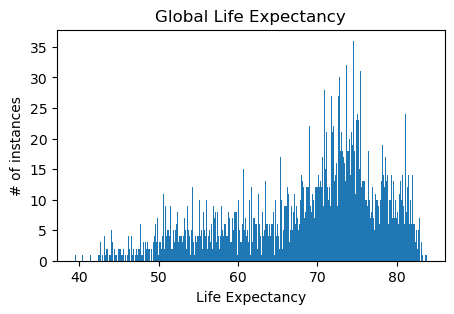

In [234]:
plt.figure(figsize=(5,3))

df['Life_expectancy'].plot.hist(bins = df['Life_expectancy'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('Life Expectancy')
plt.ylabel('# of instances')
plt.title('Global Life Expectancy')
plt.show()

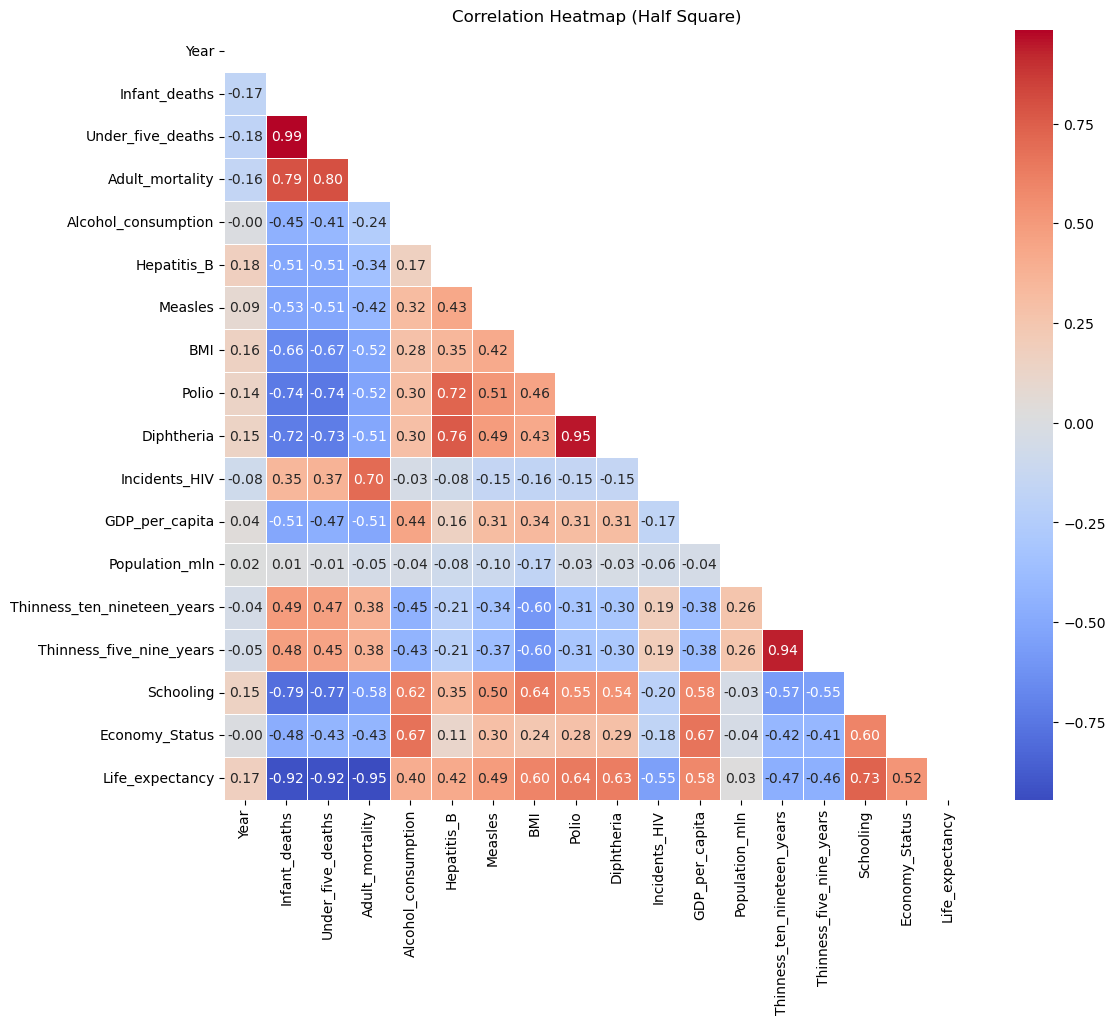

In [66]:
selected_columns = [
    
    'Year',
    'Infant_deaths',
    'Under_five_deaths',
    'Adult_mortality',
    'Alcohol_consumption',
    'Hepatitis_B',
    'Measles',
    'BMI',
    'Polio',
    'Diphtheria',
    'Incidents_HIV',
    'GDP_per_capita',
    'Population_mln',
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years',
    'Schooling',
    'Economy_Status',
    'Life_expectancy'
]

# Create a correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with masked upper triangular part
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap (Half Square)')
plt.show()

In [29]:
count_developed_0 = len(df[df['Economy_Status'] == 0])
print("Number of Developing Countries:", count_developed_0)

Number of Developing Countries: 2272


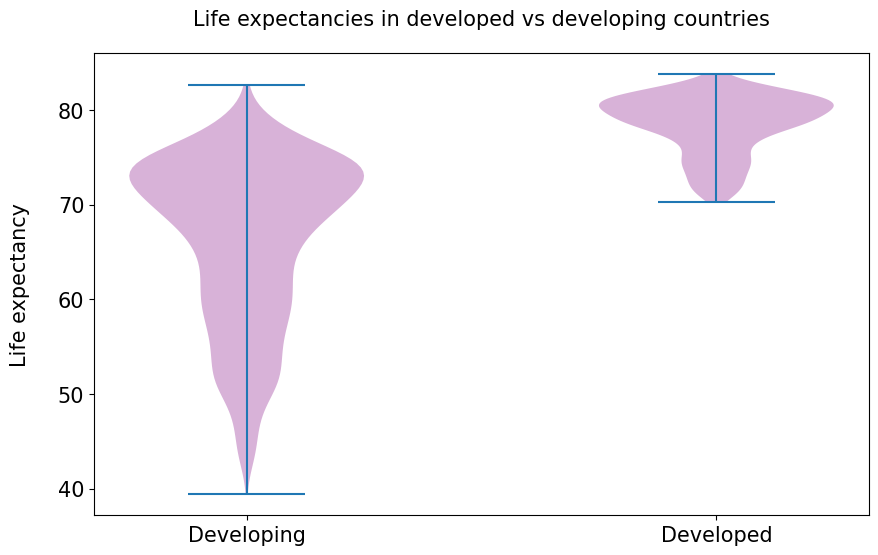

In [56]:
dataset = [df[df['Economy_Status']==0]['Life_expectancy'].values,
           df[df['Economy_Status']==1]['Life_expectancy'].values]

plt.figure(figsize=(10,6))

violins = plt.violinplot(dataset)
for body in violins['bodies']:
    body.set_facecolor('purple')
plt.xticks([1,2],['Developing','Developed'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Life expectancy', fontsize=15, labelpad=20)
plt.title('Life expectancies in developed vs developing countries', fontsize = 15, pad=20)

plt.show()

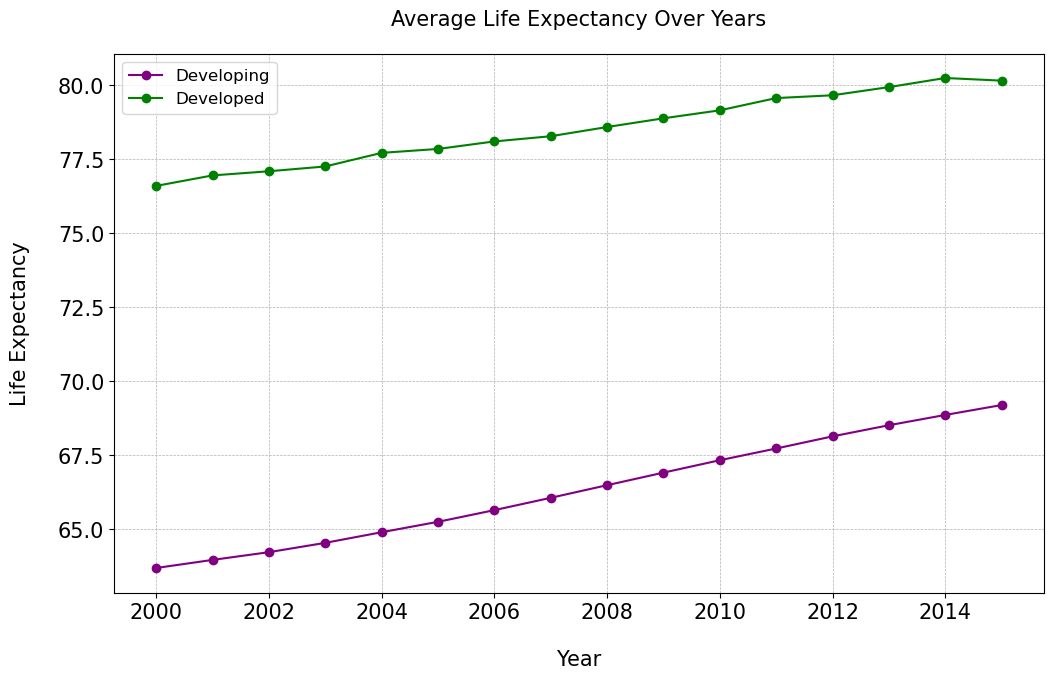

In [96]:
grouped = df.groupby(['Year', 'Economy_Status'])['Life_expectancy'].mean().unstack()


plt.figure(figsize=(12, 7))
grouped.plot(ax=plt.gca(), color=['purple', 'green'], marker='o')

plt.title('Average Life Expectancy Over Years', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Year', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(["Developing", "Developed"], fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

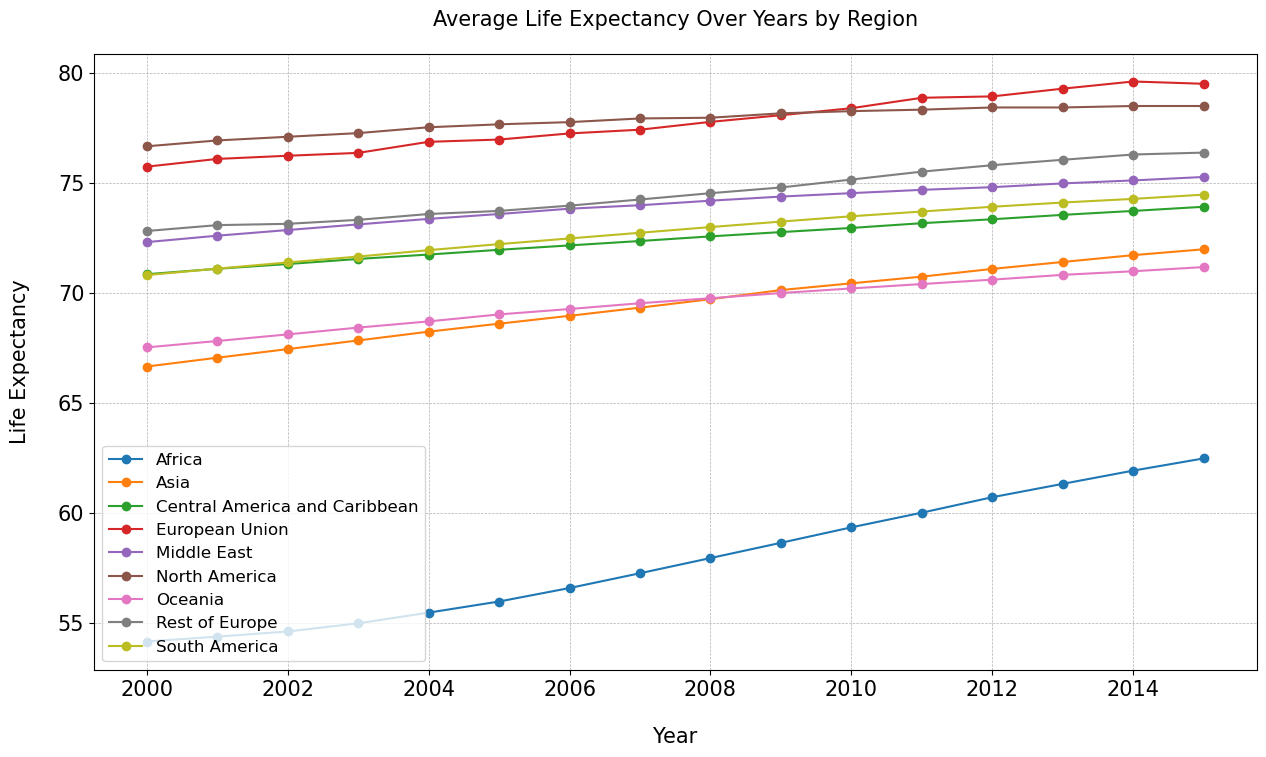

In [97]:
grouped = df.groupby(['Year', 'Region'])['Life_expectancy'].mean().unstack()

# Plot the data
plt.figure(figsize=(15, 8))
grouped.plot(ax=plt.gca(), marker='o')

plt.title('Average Life Expectancy Over Years by Region', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Year', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

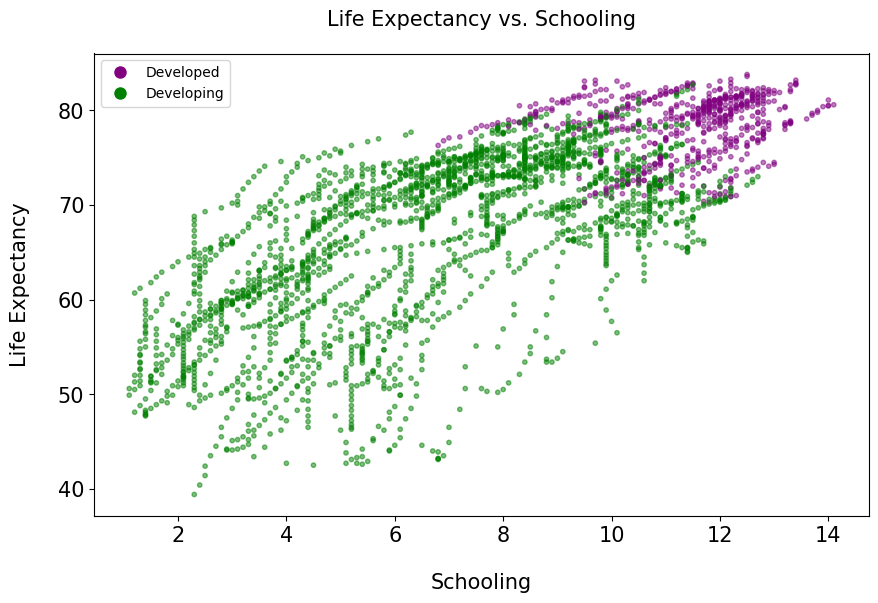

In [91]:

colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Schooling', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Schooling', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Schooling', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

#Schooling is average years that people aged 25+ spent in formal education

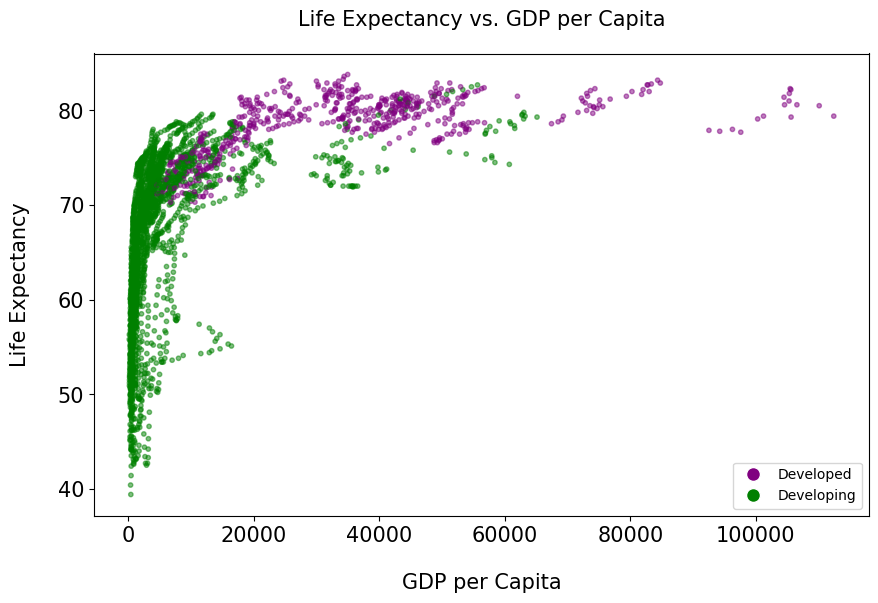

In [95]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('GDP_per_capita', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. GDP per Capita', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('GDP per Capita', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Optionally add a legend for the colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()


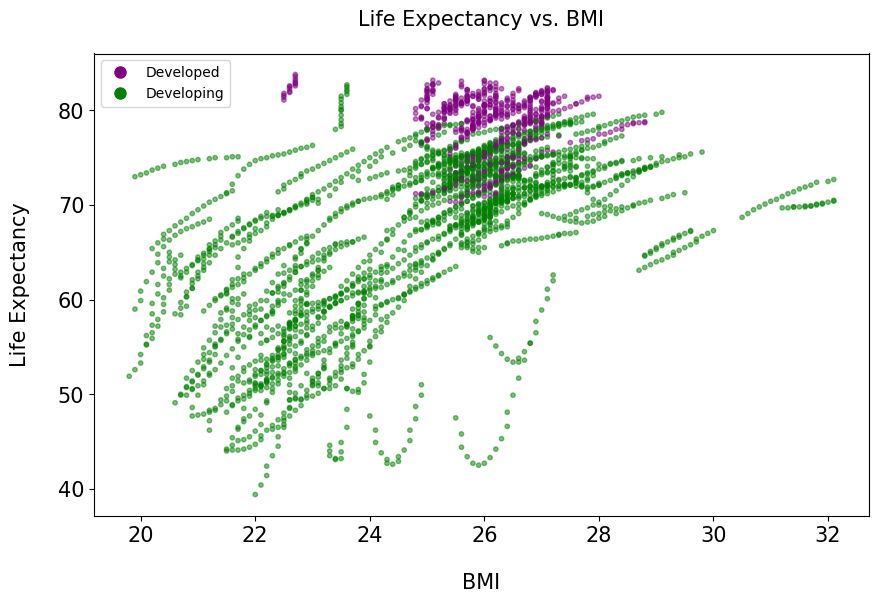

In [88]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('BMI', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. BMI', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('BMI', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

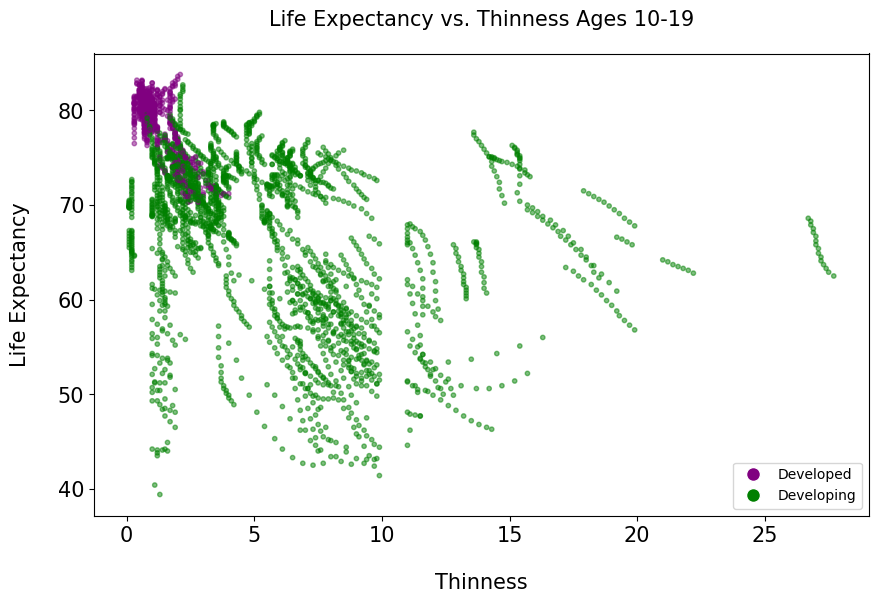

In [105]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Thinness_ten_nineteen_years', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Thinness Ages 10-19', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Thinness', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

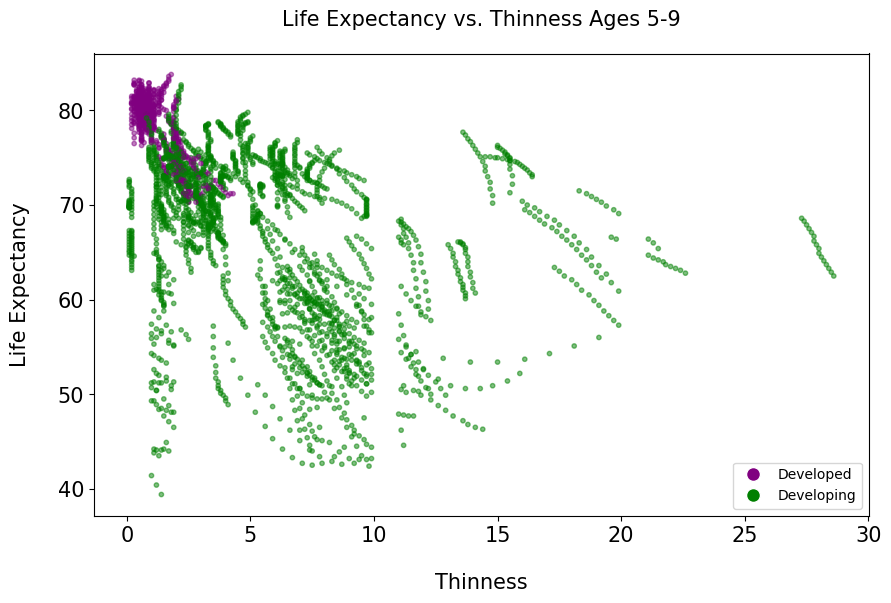

In [107]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Thinness_five_nine_years', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Thinness Ages 5-9', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Thinness', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

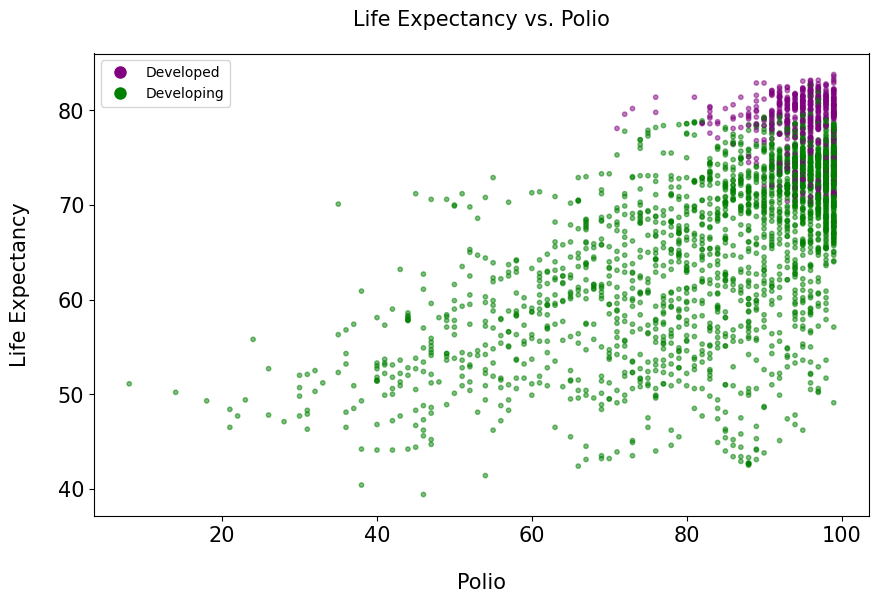

In [101]:
colors = df['Economy_Status'].map({0: 'green', 1: 'purple'})

df.plot.scatter('Polio', 'Life_expectancy', figsize=(10, 6), alpha=0.5, s=10, c=colors)
plt.title('Life Expectancy vs. Polio', fontsize=15, pad=20)
plt.ylabel('Life Expectancy', fontsize=15, labelpad=20)
plt.xlabel('Polio', fontsize=15, labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Developed', markersize=10, markerfacecolor='purple'),
                   Line2D([0], [0], marker='o', color='w', label='Developing', markersize=10, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()
#Polio is measure of polio immunization

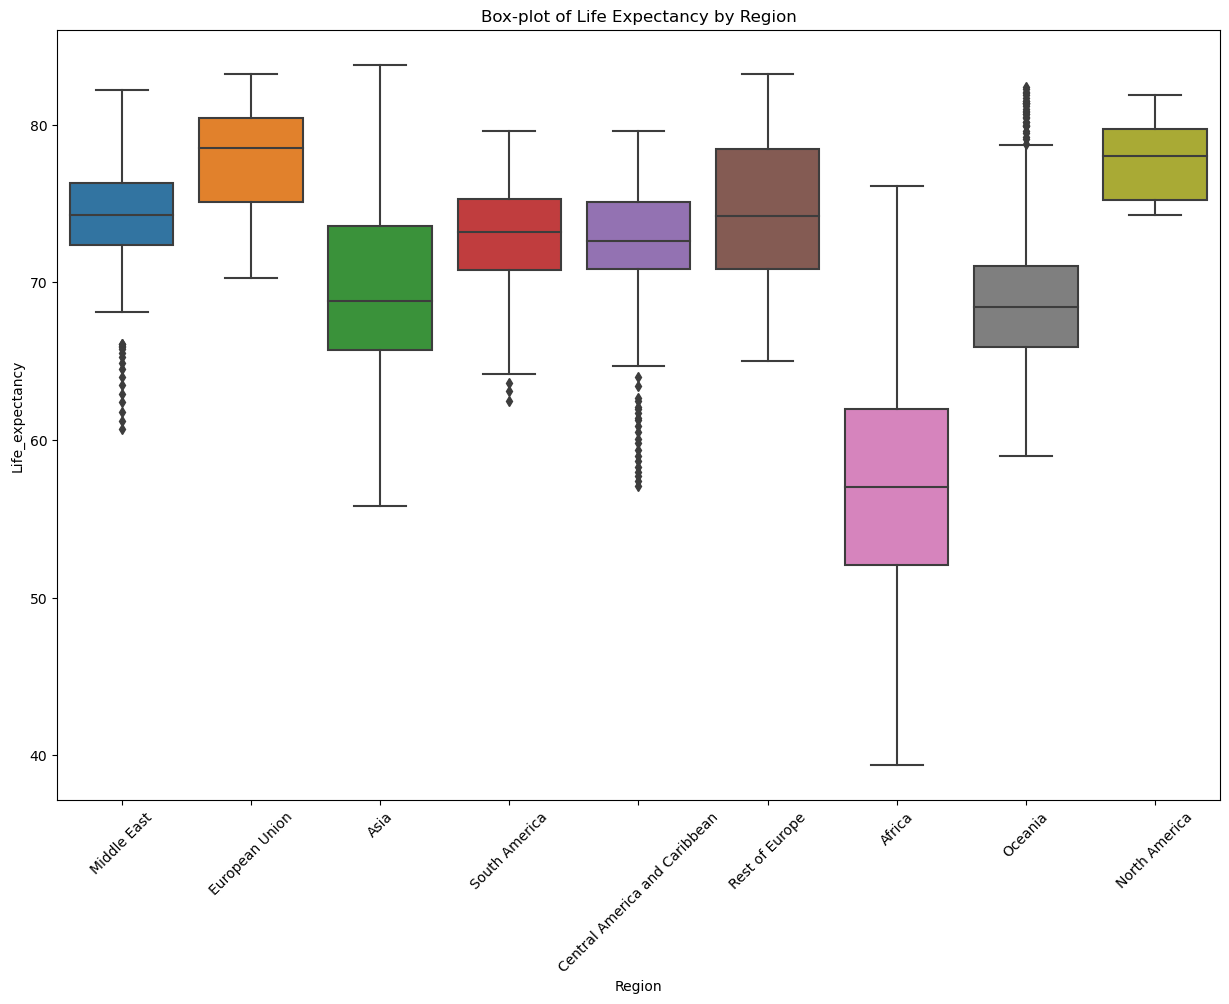

In [68]:
import seaborn as sns



# Check for missing values in 'Life_expectancy' and handle them, e.g., by removing or imputing.
df = df.dropna(subset=['Life_expectancy'])

# Plot using seaborn
plt.figure(figsize=(15,10))
sns.boxplot(x='Region', y='Life_expectancy', data=df)
plt.title("Box-plot of Life Expectancy by Region")
plt.xticks(rotation=45)
plt.show()

In [69]:
lowest_life_expectancy_index = df['Life_expectancy'].idxmin()

# Retrieve and print the entire row
row_with_lowest_life_expectancy = df.loc[lowest_life_expectancy_index]

# Print the row
print("Row with the Lowest Life Expectancy:")
print(row_with_lowest_life_expectancy)

Row with the Lowest Life Expectancy:
Country                        Sierra Leone
Region                               Africa
Year                                   2000
Infant_deaths                         138.1
Under_five_deaths                     224.9
Adult_mortality                    531.3245
Alcohol_consumption                    3.75
Hepatitis_B                              71
Measles                                  60
BMI                                    22.0
Polio                                    46
Diphtheria                               44
Incidents_HIV                          1.59
GDP_per_capita                          403
Population_mln                         4.58
Thinness_ten_nineteen_years             1.3
Thinness_five_nine_years                1.4
Schooling                               2.3
Life_expectancy                        39.4
Economy_Status                            0
Name: 1417, dtype: object


In [240]:
highest_life_expectancy_index = df['Life_expectancy'].idxmax()


row_with_highest_life_expectancy = df.loc[highest_life_expectancy_index]


print("Row with the Highest Life Expectancy:")
print(row_with_highest_life_expectancy)

Row with the Highest Life Expectancy:
Country                          Japan
Region                            Asia
Year                              2015
Infant_deaths                      2.0
Under_five_deaths                  2.7
Adult_mortality                 53.586
Alcohol_consumption               8.55
Hepatitis_B                       83.0
Measles                           93.0
BMI                               22.7
Polio                             99.0
Diphtheria                        96.0
Incidents_HIV                     0.17
GDP_per_capita                 34961.0
Population_mln                  127.14
Thinness_ten_nineteen_years        2.1
Thinness_five_nine_years           1.8
Schooling                         12.5
Life_expectancy                   83.8
Economy_Status                       1
Name: 1196, dtype: object


In [112]:
train_size = int(len(df) * 0.80)
val_size = int(len(df) * 0.10)
test_size = len(df) - train_size - val_size


train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

In [119]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='Life_expectancy') 
y = df['Life_expectancy']

encoder = OneHotEncoder(drop='first', sparse_output=False)  # updated parameter
country_encoded = encoder.fit_transform(X[['Country']])
country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['Country']))  # updated method

X = X.drop(columns='Country')
X = pd.concat([X, country_df], axis=1)

continuous_features = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 
                       'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 
                       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling']

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

KeyError: 'Status'

<Figure size 1000x600 with 0 Axes>

KeyError: 'Status'